In [1]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/content/drive/My Drive/Datasets/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Datasets/Test'

In [4]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes which means number of folders existed
folders = glob('/content/drive/My Drive/Datasets/Datasets/Train/*')

In [8]:
folders

['/content/drive/My Drive/Datasets/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Datasets/Train/audi']

In [9]:
len(folders)

3

In [10]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [11]:
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 100352) dtype=float32>

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 42s 21s/step - loss: 6.5870 - accuracy: 0.3438 - val_loss: 2.5701 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 293ms/step - loss: 7.4675 - accuracy: 0.3281 - val_loss: 9.0563 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 293ms/step - loss: 7.7784 - accuracy: 0.3438 - val_loss: 15.3583 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 291ms/step - loss: 9.5969 - accuracy: 0.3438 - val_loss: 4.9797 - val_accuracy: 0.1724
Epoch 5/50
2/2 [==============================] - 1s 295ms/step - loss: 2.5741 - accuracy: 0.5000 - val_loss: 2.7318 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 1s 294ms/step - loss: 4.6099 - accuracy: 0.4531 - val_loss: 3.3742 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 1s 304ms/step - loss: 5.5956 - acc

In [19]:
r.history

{'accuracy': [0.34375,
  0.328125,
  0.34375,
  0.34375,
  0.5,
  0.453125,
  0.453125,
  0.53125,
  0.578125,
  0.421875,
  0.515625,
  0.5,
  0.515625,
  0.59375,
  0.5625,
  0.65625,
  0.703125,
  0.71875,
  0.6875,
  0.734375,
  0.734375,
  0.796875,
  0.84375,
  0.859375,
  0.796875,
  0.828125,
  0.890625,
  0.78125,
  0.875,
  0.828125,
  0.859375,
  0.890625,
  0.90625,
  0.90625,
  0.875,
  0.90625,
  0.953125,
  0.953125,
  0.921875,
  0.96875,
  0.921875,
  0.96875,
  0.9375,
  0.90625,
  0.921875,
  0.9375,
  0.9375,
  0.9375,
  0.953125,
  0.96875],
 'loss': [6.5870490074157715,
  7.4674577713012695,
  7.778404712677002,
  9.59689712524414,
  2.574061155319214,
  4.609943866729736,
  5.595643997192383,
  4.267222881317139,
  1.273085117340088,
  2.6974687576293945,
  1.7102794647216797,
  1.4823559522628784,
  2.221916675567627,
  0.9910258650779724,
  1.241647481918335,
  0.965756893157959,
  0.7727648019790649,
  0.9884925484657288,
  0.6968328952789307,
  0.625150918960

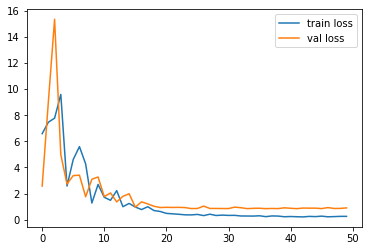

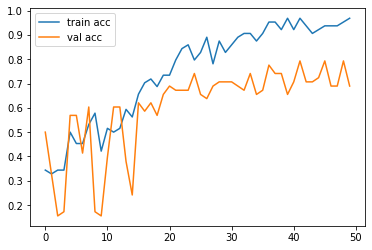

<Figure size 432x288 with 0 Axes>

In [20]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[7.2902121e-02, 7.7362530e-02, 8.4973538e-01],
       [3.3440793e-01, 2.8643904e-02, 6.3694823e-01],
       [6.2378353e-01, 1.4381267e-01, 2.3240378e-01],
       [3.3670750e-01, 5.9273213e-01, 7.0560396e-02],
       [2.3999782e-02, 8.4435964e-01, 1.3164061e-01],
       [3.6983824e-01, 3.5175732e-01, 2.7840441e-01],
       [3.1094866e-02, 9.6587092e-01, 3.0341865e-03],
       [2.6523745e-02, 2.4560392e-03, 9.7102022e-01],
       [6.1564933e-06, 1.0073306e-03, 9.9898654e-01],
       [8.0542111e-01, 5.2158441e-03, 1.8936306e-01],
       [3.9293103e-02, 3.4029207e-01, 6.2041485e-01],
       [9.7208977e-01, 9.3838675e-03, 1.8526278e-02],
       [9.6000731e-02, 8.5627818e-03, 8.9543647e-01],
       [1.6109559e-01, 4.7247994e-01, 3.6642447e-01],
       [1.2542446e-01, 5.9424561e-02, 8.1515098e-01],
       [1.8920847e-03, 9.9051309e-01, 7.5947726e-03],
       [4.9450647e-02, 4.1225720e-03, 9.4642675e-01],
       [7.4471873e-03, 2.1357417e-02, 9.7119540e-01],
       [8.8763185e-02, 6.951

In [24]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0])

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:

model=load_model('model_resnet50.h5')

In [28]:
img=image.load_img('/content/drive/My Drive/Datasets/Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

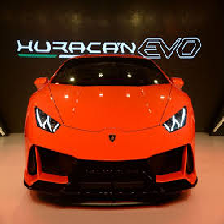

In [29]:
img

In [30]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/preprocessing/image/__init__.py'>

In [31]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:

model.predict(img_data)

array([[0.13750893, 0.26371023, 0.5987808 ]], dtype=float32)

In [37]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
a

array([2])

In [39]:
a==1

array([False])